## Importing all Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
x_train = np.genfromtxt('../Datasets/X_train.csv', delimiter = ',')[1:, 1:]
x_test  = np.genfromtxt('../Datasets/X_test.csv', delimiter = ',')[1:, 1:]

In [3]:
y_train = np.genfromtxt('../Datasets/y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('../Datasets/y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

## BaseLine Model

In [4]:
clf = LogisticRegression(random_state = 0, max_iter = 7000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [7]:
print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        29
         1.0       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

-----------------------------------------------------------------------


In [8]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Confusion matrix : 
 [[27  2]
 [ 4 28]]
-----------------------------------------------------------------------
Train Accuracy : 86.78%
Test Accuracy  : 90.16%
-----------------------------------------------------------------------


## Effecte of C on Acccuracy and Parameter tuning

In [10]:
def Parameter_Tuning(x_train, x_validate, y_train, y_validate):
    max_acc = -1
    c_max = 1 
    c_range = np.logspace(-4, 4, 20)
    train_accuracy_score_list = list()
    test_accuracy_score_list = list()
    for c in c_range:
        # fitting model
        model = LogisticRegression(solver = 'lbfgs',C = c, random_state = 0, max_iter = 20000)
        model.fit(x_train, y_train)
        
        # validating model and obtaining validation score
        y_pred_test = model.predict(x_test)
        acc_test = accuracy_score(y_test , y_pred_test)
        test_accuracy_score_list.append(acc_test)
        
        # obtaining training score
        y_pred_train = model.predict(x_train)
        acc_train = accuracy_score(y_train, y_pred_train)
        train_accuracy_score_list.append(acc_train)
        
        print('c : ', c, " accuracy_test : ", acc_test , " accuracy_train : ", acc_train)
        if max_acc < acc_test:
            max_acc = acc_test
            c_max = c
            
    print('\n\nBest C for better accuracy : ', c_max)
    return c_max, c_range, test_accuracy_score_list, train_accuracy_score_list


c :  0.0001  accuracy_test :  0.5245901639344263  accuracy_train :  0.5495867768595041
c :  0.00026366508987303583  accuracy_test :  0.5245901639344263  accuracy_train :  0.5495867768595041
c :  0.0006951927961775605  accuracy_test :  0.5409836065573771  accuracy_train :  0.5578512396694215
c :  0.0018329807108324356  accuracy_test :  0.8032786885245902  accuracy_train :  0.7231404958677686
c :  0.004832930238571752  accuracy_test :  0.7868852459016393  accuracy_train :  0.7851239669421488
c :  0.012742749857031334  accuracy_test :  0.8360655737704918  accuracy_train :  0.7933884297520661
c :  0.03359818286283781  accuracy_test :  0.8688524590163934  accuracy_train :  0.8057851239669421
c :  0.08858667904100823  accuracy_test :  0.8688524590163934  accuracy_train :  0.8471074380165289
c :  0.23357214690901212  accuracy_test :  0.9016393442622951  accuracy_train :  0.8553719008264463
c :  0.615848211066026  accuracy_test :  0.9016393442622951  accuracy_train :  0.8636363636363636
c :  1

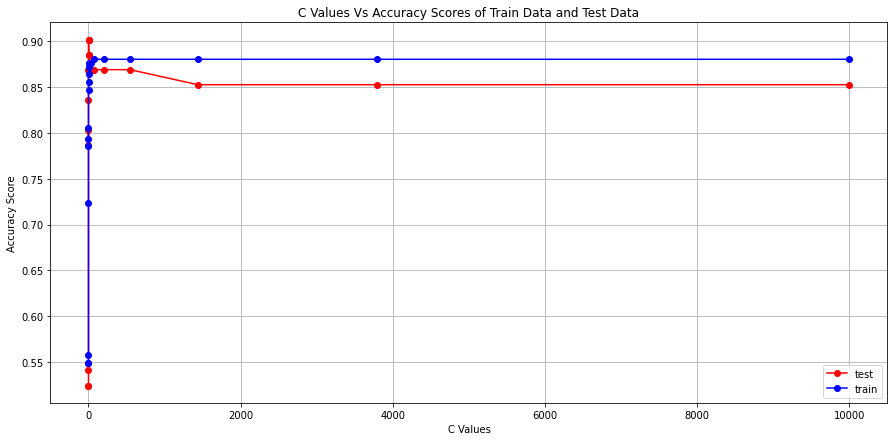

In [11]:
c_max, c_range, test_accuracy_score_list, train_accuracy_score_list = Parameter_Tuning(x_train, x_test, y_train, y_test)
print('\n\n\n')
fig, ax = plt.subplots(figsize = (15, 7))
ax.plot(c_range, test_accuracy_score_list, marker = 'o', color = 'red', label = 'test')
ax.plot(c_range, train_accuracy_score_list, marker = 'o', color = 'blue', label = 'train')
ax.set_xlabel("C Values")
ax.set_ylabel("Accuracy Score")
ax.set_title("C Values Vs Accuracy Scores of Train Data and Test Data")
ax.legend()
plt.grid()
plt.show()

In [21]:
model = LogisticRegression(solver = 'lbfgs',C = c_max, random_state = 0, max_iter = 20000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [23]:
print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        29
         1.0       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

-----------------------------------------------------------------------


In [15]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_predict))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,model.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_predict)*100))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Confusion matrix : 
 [[27  2]
 [ 4 28]]
-----------------------------------------------------------------------
Train Accuracy : 85.54%
Test Accuracy  : 90.16%
-----------------------------------------------------------------------


## GRID SEARCH

In [17]:
param = [
  {'solver': ['newton-cg', 'lbfgs', 'liblinear','saga'],
   'penalty':['l2','l1','elasticnet'],
    'C':[ 100,10, 1.0, 0.1, 0.01,0.0001],
   'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
   },
 ]
grid_clf = GridSearchCV(clf, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(x_train,y_train)
grid_clf.best_params_

{'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [24]:
model = LogisticRegression(solver = 'newton-cg',C=10,l1_ratio=0.1,penalty='l2',max_iter = 20000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_predict))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,model.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_predict)*100))

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        29
         1.0       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

-----------------------------------------------------------------------
-----------------------------------------------------------------------
Confusion matrix : 
 [[26  3]
 [ 4 28]]
-----------------------------------------------------------------------
Train Accuracy : 88.02%
Test Accuracy  : 88.52%
